In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-fires-in-brazil/amazon.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('/kaggle/input/forest-fires-in-brazil/amazon.csv', encoding='latin1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [6]:
# Convert categorical columns to numeric
df['state'] = df['state'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes

# Convert 'date' to numeric for modeling
df['date'] = pd.to_datetime(df['date']).map(pd.Timestamp.toordinal)

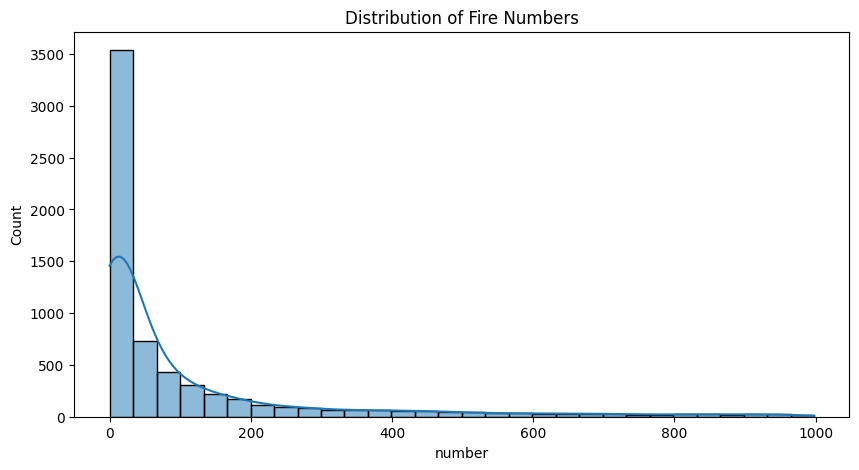

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df['number'], bins=30, kde=True)
plt.title("Distribution of Fire Numbers")
plt.show()

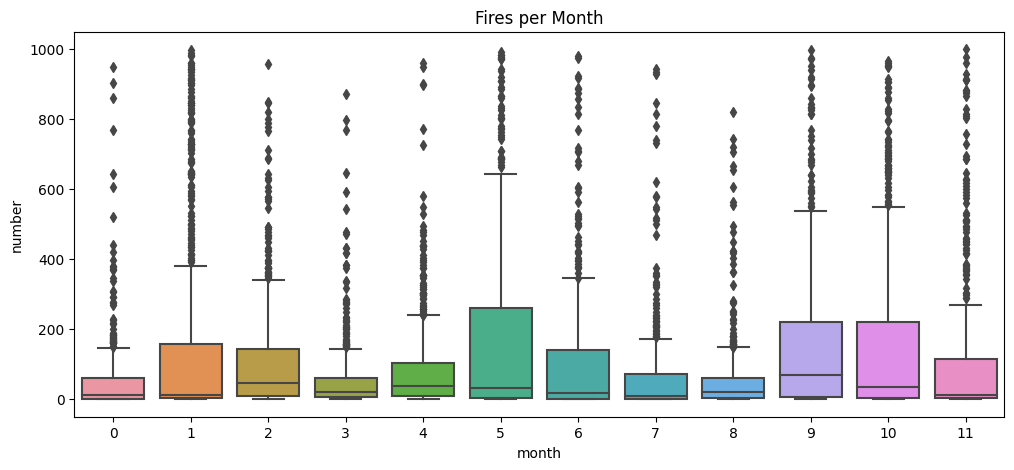

In [8]:
plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='number', data=df)
plt.title("Fires per Month")
plt.show()

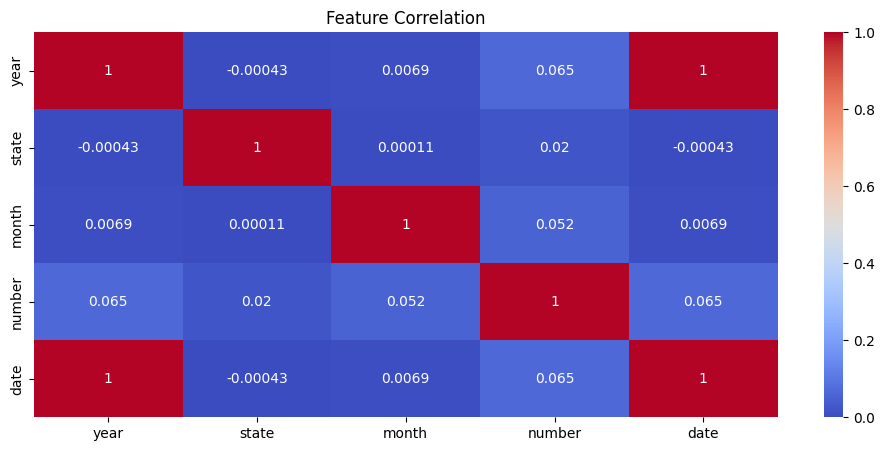

In [9]:
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(12,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [10]:
X = df[['year', 'state', 'month', 'date']]  # Features
y = df['number']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")
print("Best Model: RandomForestRegressor")

Mean Squared Error: 26798.30
R2 Score: 0.23
Best Model: RandomForestRegressor


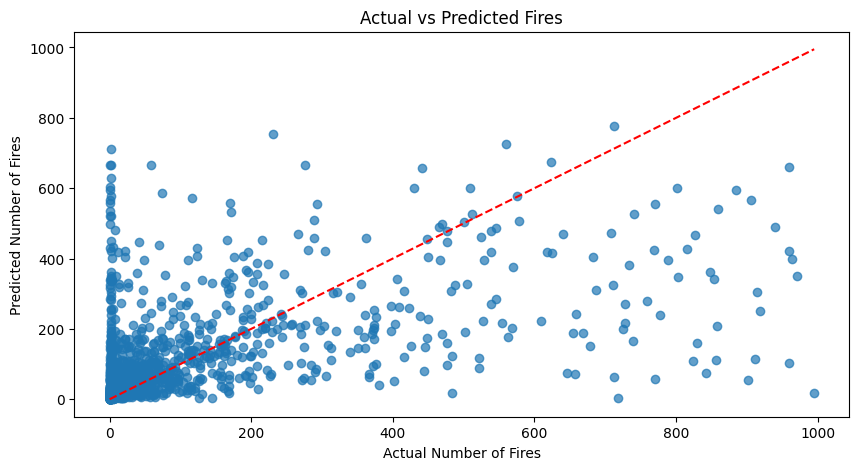

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Number of Fires")
plt.ylabel("Predicted Number of Fires")
plt.title("Actual vs Predicted Fires")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()